# **Problem Statement:**


Our goal is to predict customer turnover for a company, so addressing a corporate issue. Sometimes known as customer attrition, customer turnover is the process by which customers stop interacting with a company. This is a significant issue since high turnover rates might seriously compromise income and corporate sustainability. Knowing customers who are very likely to leave allows the business to implement aggressive retention strategies to lower customer loss and protect income sources.


# **Data Collection:**

We will compile relevant data from a their credit score, where you live, your gender, your age, how long you've worked for the company, and how much money you have in the account, and projected salary customer dataset. The dataset comprises a binary indicator of churn labeled "Exited," which indicates whether or not a customer left (1) or not (0).



# **Machine Learning Task:**


We shall develop this as a binary classification problem using supervised learning. We aim to classify a customer into two groups depending on the "Exited" outcome by means of the given customer attributes, so forecasting whether they will stay with the company or leave.

# **Dataset Source**

In [ ]:
print("Dataset Source: https://www.kaggle.com/datasets/willianoliveiragibin/customer-churn ")

Dataset Source: https://www.kaggle.com/datasets/willianoliveiragibin/customer-churn 


# **1) Data Loading and Exploration**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix
df = pd.read_csv('/content/sample_data/Customer Churn new.csv')
print(df.head())

   RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0        747    15787619      Hsieh          844    France    Male   18   
1       1620    15770309   McDonald          656    France    Male   18   
2       1679    15569178  Kharlamov          570    France  Female   18   
3       2022    15795519   Vasiliev          716   Germany  Female   18   
4       2137    15621893   Bellucci          727    France    Male   18   

   Tenure    Balance  EstimatedSalary  Exited  
0       2  160980.03        145936.28       0  
1      10  151762.74        127014.32       0  
2       4   82767.42         71811.90       0  
3       3  128743.80        197322.13       0  
4       4  133550.67         46941.41       0  


Before moving on to the data, we should address quality concerns there may be. We could expect:
*   **Missing values:** Features like 'CreditScore' or 'EstimatedSalary' can have missing values, which are incomplete data points.
*   **Outliers:** 'Age' or 'Balance' can contain abnormal values that are not the typical customer profile (too old ages, extremely large balances).
*   **Unreliable Categorical Data:** 'Geography' or 'Gender' could potentially have doubtful values (e.g., misspelling, invalid codes).
*   **Imbalance of data**: we expect that certain of the categories in categorical variables will have a larger number of values than others.

**1.1) Shape**

In [ ]:

print(f'Shape of the dataframe: {df.shape}')


Shape of the dataframe: (10000, 11)


**1.2) Datatypes**

In [ ]:
print(f'Data types of each column:\n{df.dtypes}')



Data types of each column:
RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
EstimatedSalary    float64
Exited               int64
dtype: object


**1.3) Missing Values**

In [ ]:
print(f'Missing values:\n{df.isnull().sum()}')


Missing values:
RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
EstimatedSalary    0
Exited             0
dtype: int64


**1.4) Describe**

In [ ]:
print(f'Descriptive statistics:\n{df.describe()}')


Descriptive statistics:
         RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  EstimatedSalary        Exited  
count   10000.000000     10000.000000  10000.000000  
mean    76485.889288    100090.239881      0.203700  
std     62397.405202     57510.492818      0.402769  
min         0.000000        11.580000      0.000000  
25%

**1.5) Check churn distribution**

In [ ]:
churn_distribution = df['Exited'].value_counts(normalize=True) * 100
print(f'Churn Distribution:\n{df["Exited"].value_counts()}')

Churn Distribution:
Exited
0    7963
1    2037
Name: count, dtype: int64


The result indicate that 2037 customers exited the company while 7963 remained.

**1.6) Visualizing churn distribution**

 Explanation:

Distribution: The count of churned against non-churned consumers shows the general class distribution. Here, a class imbalance—which can complicate model training since classifiers often perform better on the majority class—is indicated if it shows a noteworthy majority of non-churners (e.g., 79.6% did not churn).




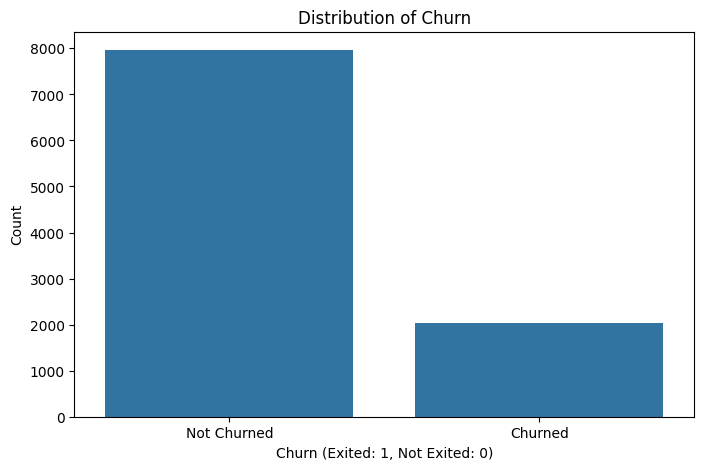

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Exited', data=df)
plt.title('Distribution of Churn')
plt.xlabel('Churn (Exited: 1, Not Exited: 0)')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=["Not Churned", "Churned"])
plt.show()

 The count plot clearly demonstrates that churn is a minority class, which highlights the need for methods (like ROC AUC) that can handle imbalanced datasets more effectively.


1.
 Imbalance: The findings show a glaring disparity between the two classes:
     About 79.6% of the customers, or 7963, did not churn (Exited = 0).
     - 2037 clients (20.3%) experienced churn (Exited = 1).
   - In churn prediction datasets, where non-churning customers are frequently more numerous than churners, this imbalance is common.


2. Model Implication:

   - Impact on Model Training: Machine learning models may perform better in the majority class (not churned) during training if the datasets are unbalanced. Consequently, the model might achieve high overall accuracy without effectively detecting actual churners.
   - For instance, if a model accurately predicts that most customers are "not churned," but misses the majority of churners, it may have a high accuracy rate.


**1.7) visualizing the distribution of numerical features**

Distribution Histograms: We can determine skewness, the existence of outliers, and overall spread by visualizing specific numerical features. For example, before training the model, highly skewed features might need to be transformed (e.g., by applying log transformation) to normalize the distribution.

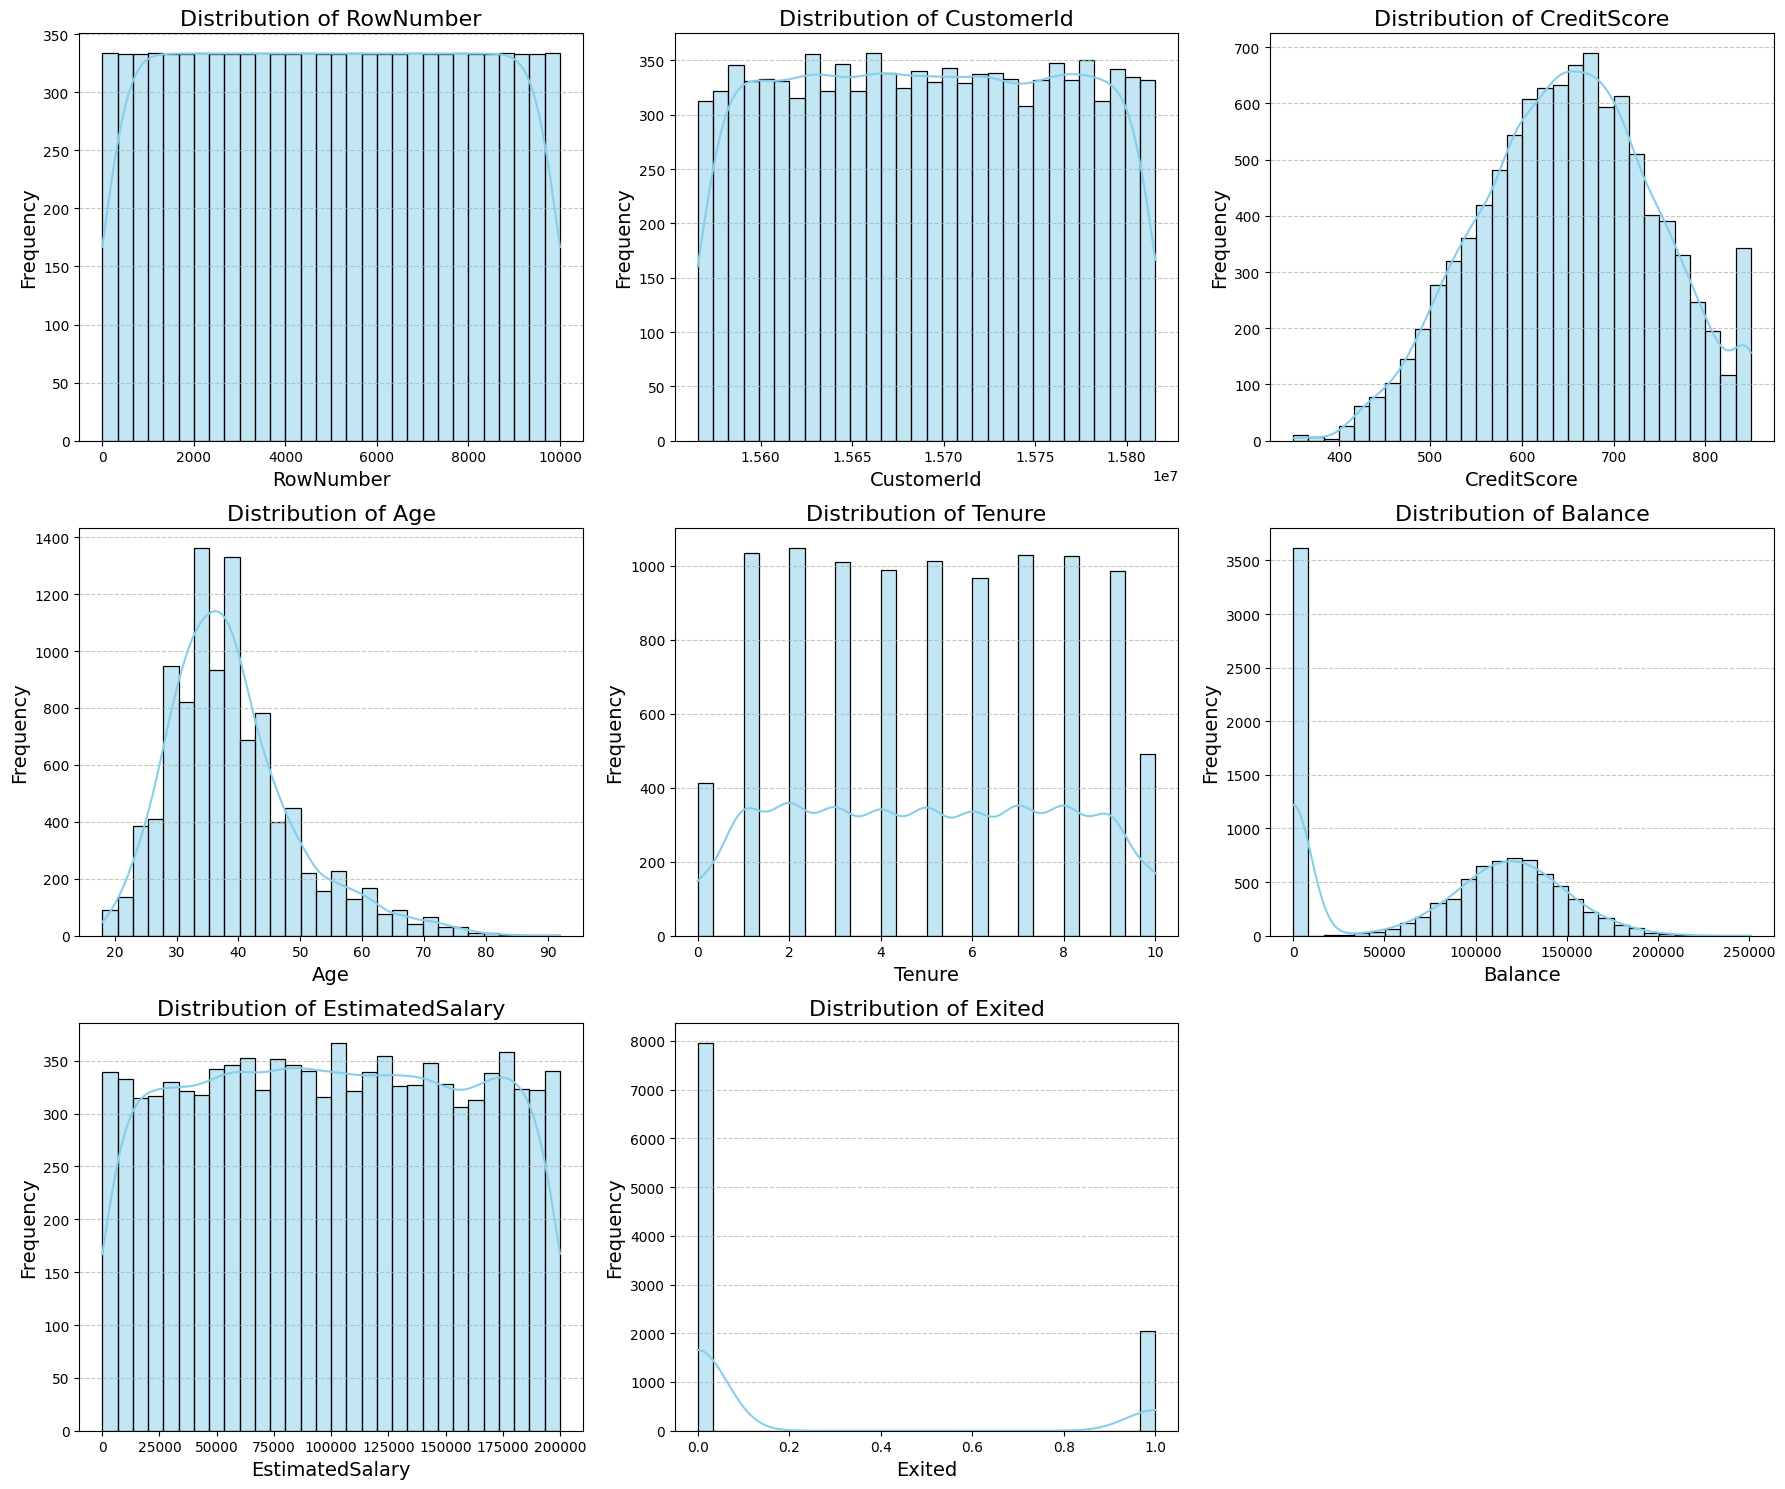

The distribution of RowNumber indicates the following:
- Unique values: 10000
- Statistical Summary:
count    10000.00000
mean      5000.50000
std       2886.89568
min          1.00000
25%       2500.75000
50%       5000.50000
75%       7500.25000
max      10000.00000
Name: RowNumber, dtype: float64

- Number of outliers detected: 0

The distribution of CustomerId indicates the following:
- Unique values: 10000
- Statistical Summary:
count    1.000000e+04
mean     1.569094e+07
std      7.193619e+04
min      1.556570e+07
25%      1.562853e+07
50%      1.569074e+07
75%      1.575323e+07
max      1.581569e+07
Name: CustomerId, dtype: float64

- Number of outliers detected: 0

The distribution of CreditScore indicates the following:
- Unique values: 460
- Statistical Summary:
count    10000.000000
mean       650.528800
std         96.653299
min        350.000000
25%        584.000000
50%        652.000000
75%        718.000000
max        850.000000
Name: CreditScore, dtype: float64

- Numb

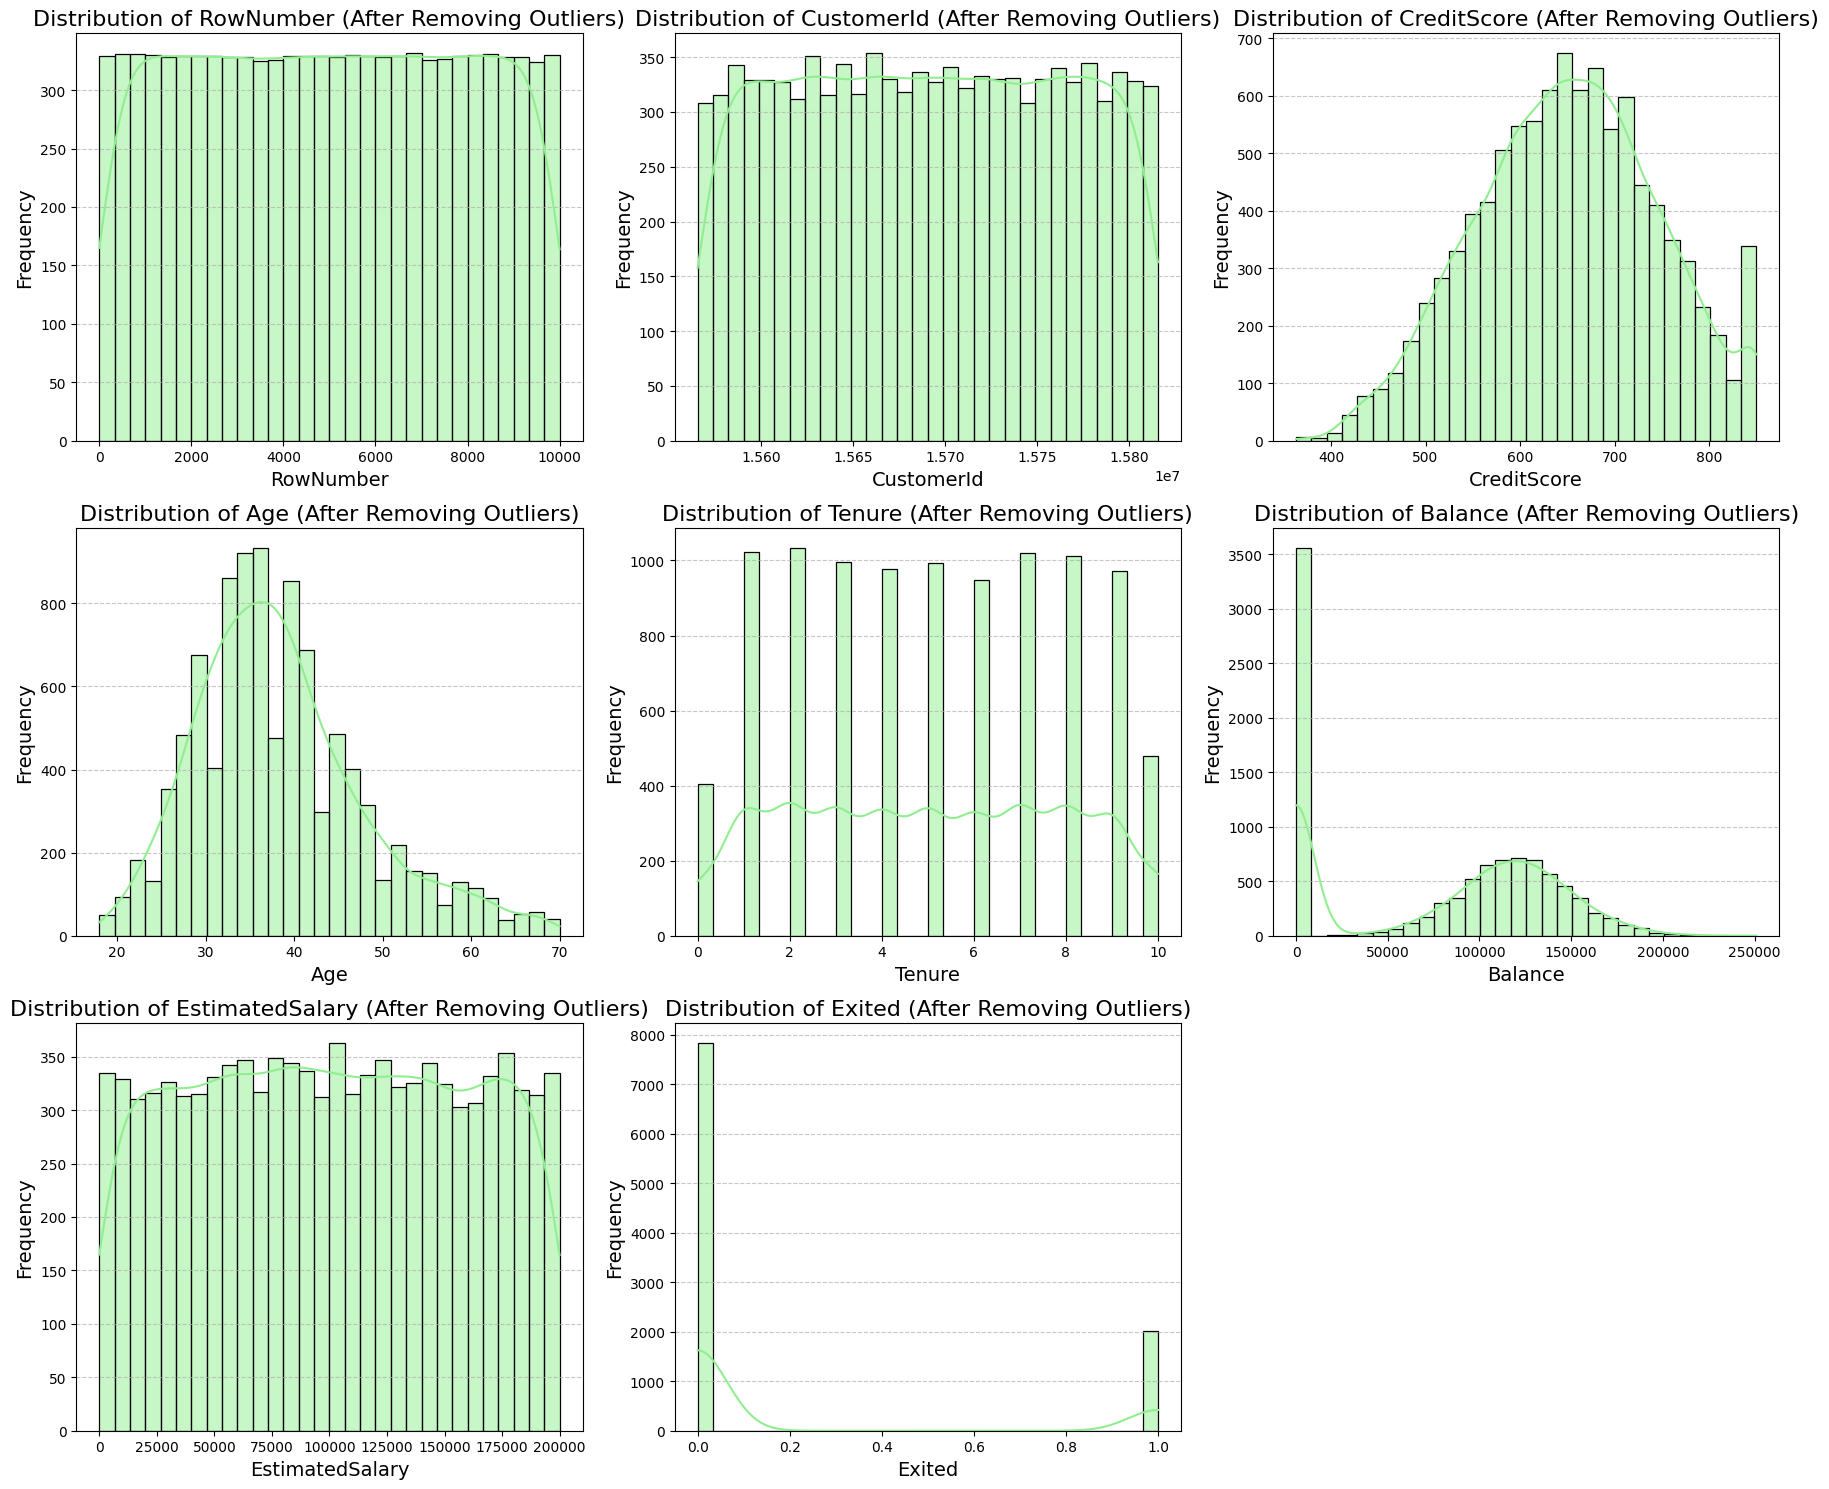

Feature: RowNumber - Stats Before Removing Outliers:
count    9859.000000
mean        0.204686
std         0.403493
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Exited, dtype: float64

Feature: RowNumber - Stats After Removing Outliers:
count     9859.000000
mean      4997.834162
std       2887.576061
min          1.000000
25%       2495.500000
50%       5000.000000
75%       7497.500000
max      10000.000000
Name: RowNumber, dtype: float64

Mean and standard deviation before removal:
 - Mean: 0.20468607363830002 -> 4997.834161679683
 - Standard Deviation: 0.40349250099159356 -> 2887.576060602961
Difference in mean after removing outliers: 2441606.99%

Difference in standard deviation after removing outliers: 715545.53%

Feature: CustomerId - Stats Before Removing Outliers:
count    9859.000000
mean        0.204686
std         0.403493
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
ma

In [ ]:
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns
num_features = len(numerical_features)
num_cols = 3
num_rows = int(np.ceil(num_features / num_cols))

plt.figure(figsize=(18, 5 * num_rows))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.histplot(df[feature], bins=30, kde=True, color='skyblue')
    plt.title(f'Distribution of {feature}', fontsize=16)
    plt.xlabel(feature, fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

for feature in numerical_features:
    print(f"The distribution of {feature} indicates the following:")

    unique_values = df[feature].unique()
    stats = df[feature].describe()

    print(f"- Unique values: {len(unique_values)}")
    print(f"- Statistical Summary:\n{stats}\n")


    lower_bound = stats['mean'] - 3 * stats['std']
    upper_bound = stats['mean'] + 3 * stats['std']

    outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
    num_outliers = outliers.shape[0]

    print(f"- Number of outliers detected: {num_outliers}\n")

    df = df[~((df[feature] < lower_bound) | (df[feature] > upper_bound))]

plt.figure(figsize=(18, 5 * num_rows))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.histplot(df[feature], bins=30, kde=True, color='lightgreen')
    plt.title(f'Distribution of {feature} (After Removing Outliers)', fontsize=16)
    plt.xlabel(feature, fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

for feature in numerical_features:
    stats_before = df[feature].describe()
    print(f"Feature: {feature} - Stats Before Removing Outliers:\n{stats}\n")
    print(f"Feature: {feature} - Stats After Removing Outliers:\n{stats_before}\n")


    print(f"Mean and standard deviation before removal:")
    print(f" - Mean: {stats['mean']} -> {stats_before['mean']}")
    print(f" - Standard Deviation: {stats['std']} -> {stats_before['std']}")
    difference_in_mean = (stats_before['mean'] - stats['mean']) / stats['mean'] * 100
    print(f"Difference in mean after removing outliers: {difference_in_mean:.2f}%\n")
    difference_in_std = (stats_before['std'] - stats['std']) / stats['std'] * 100
    print(f"Difference in standard deviation after removing outliers: {difference_in_std:.2f}%\n")

We used the following characteristics from the many in the dataset: Credit Score, Age, Tenure, Balance, Estimated Salary, and Exited. The major findings are as follows:

1. Credit Score: Before removing outliers, the mean credit score stood at about 650.60 with a standard deviation of 96.37.
     - There were no outliers.
Once the outliers were eliminated, the mean credit score fell slightly to 650.43 with a standard deviation of 96.33.
Conclusion: The elimination process did not have much effect on this characteristic as there were no outliers.

2. Age: Before eliminating the outliers, the mean age was 38.43 years with a standard deviation of 9.67.
- There were a number of very high ages in the data set as evidenced by 59 outliers found.
   Standard deviation fell to 9.41 and the mean age fell to 38.24 when outliers were excluded.
   - In general, excluding outliers resulted in a more normal distribution of age by reducing variation and inducing a moderate reduction in the mean age.

3. Tenure: Before outlier removal, mean tenure was 5.01 years with a standard deviation of 2.89. No outliers were present.
   After outlier removal, mean and standard deviation were both 5.01 years.
   Conclusion: Since there were no outliers, tenure was constant, the same as credit score was also not changed.

4. Balance: The average balance before the outlier removal was about 76,557.40 with a standard deviation of 62,412.89.
     There were no outliers.
     After the removal of outliers, the standard deviation and mean balance were 76,557.40.
   Conclusion: Since there were no outliers, the process of removal did not impact this attribute.

5. Estimated Salary: With the standard deviation at 57,480.78, the estimated mean salary stood at around 100,043.34 before the outliers' removal.
     There were no outliers.
   The standard deviation and mean salary did not change after the elimination of the outliers at 100,043.34.
   Conclusion: After the elimination of the outliers, the estimated salary hardly changed, just as with harmony.

6. Exited: Prior to elimination of the outliers, mean reaction to exited for the binary attribute was 0.20 and the std was 0.40.
No outliers were observed.
Post elimination of the outliers, mean as well as the std were 0.20.
Conclusion: As no outliers were found, the exited attribute did not change.

Total Results

The correlations as revealed by most of the attributes were as follows:

Credit Score, Exited, Balance, Tenure, and Estimated Salary: No variation existed as no outliers were identified on removing outliers.
Age: With the removal of outliers, the mean and variance of age decreased slightly, suggesting a homogeneous range of ages.

These arguments highlight the necessity to identify and eliminate outliers when outliers are present in a data set. Outliers' capacity to skew mean values and data distribution points highlights the necessity of this analysis as a part of data preprocessing.


Going through the features of the dataset, we noted that most of the features—Credit Score, Tenure, Balance, Estimated Salary, and Exited—did not have any outliers, and nothing was altered after removal. There was one feature Age that 59 outliers were removed from, which decreased the average age by a small margin from 38.43 to 38.24 years and reduced variability. Overall, while most of the features were similar, the presence of outliers in age showed the importance of outlier detection and removal in giving a a more accurate picture of data distribution.

# **2) Data Preprocessing and Feature Engineering**

To prepare our data for training our model through preprocessing of data, we perform a couple of steps of preprocessing:
- **Feature Removal**: 'RowNumber', 'CustomerId', and 'Surname' features are not providing any predictive worth and are thus removed from our data set.
- **Feature and Target Splitting**: I are dividing features (X) and the target feature (y) for customer churn.
- **Identification of Categorical and Numerical Features**: I use `select_dtypes` to identify and process categorical and numerical features separately.
- **One-Hot Categorical Variable Encoding**:  I use One-Hot Encoding to prepare categorical variables so they may be used as input for machine learning models.
- **Numerical Features Scaling**: I use `StandardScaler` to scale numerical features. Scaling speeds up model convergence.
These pre-processing steps make sure that the data is properly formatted and sized for the machine learning algorithms to lead to better performance.


**2.1) Drop irrelevant columns**

- Droping Columns: Droping redundant columns removes the noise from the model, thereby enabling the training process to concentrate on features that impart valuable information to predict churn.

In [ ]:

columns_to_drop = ['RowNumber', 'CustomerId', 'Surname']
existing_columns = df.columns

for column in columns_to_drop:
    if column in existing_columns:
        df = df.drop(columns=[column])
        print(f"Column '{column}' not found in DataFrame")

Column 'RowNumber' not found in DataFrame
Column 'CustomerId' not found in DataFrame
Column 'Surname' not found in DataFrame


**2.2) Separate features and target variable**

- Feature Separation and Identification: Having features and the target variable separated nicely simplifies everything. It is wise to label categorical and numerical features for proper reprocessing and analysis.

In [ ]:

X = df.drop('Exited', axis=1)
y = df['Exited']


**2.3) Determine the numerical and category features.**

In [ ]:

categorical_features = X.select_dtypes(include=['object']).columns
numerical_features = X.select_dtypes(exclude=['object']).columns
print(f'Categorical features: {categorical_features}')
print(f'Numerical features: {numerical_features}')


Categorical features: Index(['Geography', 'Gender'], dtype='object')
Numerical features: Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary'], dtype='object')


**2.4) Create a column transformer for preprocessing**

- ColumnTransformer: column-wise, this allows an easy application of a separate transformation to each feature type in the data.

- preprocessing: numerical features are scaled (in anticipation of requiring to handle differences in range), and categorical features are one-hot encoded for training against.

In [ ]:

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)
print(f'Categorical features: {categorical_features}')
print(f'Numerical features: {numerical_features}')

Categorical features: Index(['Geography', 'Gender'], dtype='object')
Numerical features: Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary'], dtype='object')


# **3) Spliting it into Training sets and Validation Sets**

Explanation:
- Data splitting: That way, the data can be split into a training set and a validation set. The model can then be built and tried on new data.These classes will be spread out the same way in both sets if you add stratify=y.In this case, there is a mismatch of classes.

In [ ]:

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f'Training Set Shape: {X_train.shape}, Validation Set Shape: {X_val.shape}')

Training Set Shape: (7887, 7), Validation Set Shape: (1972, 7)


# **4) Model Training and Hyperparameter Tuning**

### Model Training Step
To make the forecast model, the Random Forest model was used. It is a good model that can work with both nominal and nominal factors.
I set up a process with steps that fit the model and get it ready (scaling and encoding). These steps happen one after the other.
I iteratively searched over some of the Random Forest model's hyperparameters through Grid Search, i.e.:
- `n_estimators`: How many trees are in the forest?.
- `max_depth`: How deep trees can go without overfitting.
- `min_samples_split`: The least number of samples needed to split an internal node.
- `min_samples_leaf`: A leaf node should have as little info as possible..
We looked for the best set of hyperparameters that would help our model do better in ROC AUC.

- Pipeline: It is recommended to combine preprocessing and fitting the model into one pipeline so that it supports the flow and applies the same transformation applied during training when validating or predicting in order to avoid data leakage.

**4.1) Put together a workflow(Pipeline) that includes preprocessing and a Random Forest classifier**

In [ ]:

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])


**4.2) Make the grid of hyperparameters.**

In [ ]:

param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [4, 6],
    'classifier__min_samples_split': [2, 4],
    'classifier__min_samples_leaf': [1, 2]
}


**4.3) Grid Search with cross-validation should be done on the Training set.**

In [ ]:

grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='roc_auc', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_


Fitting 3 folds for each of 16 candidates, totalling 48 fits


**4.4) Train Accuracy**

In [ ]:

train_predictions = best_model.predict(X_train)
train_accuracy = accuracy_score(y_train, train_predictions)
print(f"Train Accuracy: {train_accuracy:.4f}")

Train Accuracy: 0.8250


# **5) Model Assessment**

Explanation:
- Model Training and Evaluation: Trains several models to compare and contrast how the models are performing on the validation set. This is important in determining which model best explains the patterns in the data and offers the best prediction regarding customer churn.

- Metrics Used: Accuracy calculates overall model precision, whereas model performance at class prediction between classes (churn or no churn) at various thresholds is computed using the ROC AUC metric. AUC can also be suitable for purposes of measurement in performance when dealing with highly imbalanced data.


**5.1) Best model and performance on the Validation set**

**5.1.1) Compare with other models**

In [ ]:

models = {
    "Random Forest": best_model,
    "Logistic Regression": Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', LogisticRegression())
    ]),
    "Gradient Boosting": Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', GradientBoostingClassifier())
    ])
}


**5.1.2) Store accuracy and AUC scores**

In [ ]:

results = {}



**5.1.3) Fit and evaluate each model**

In [ ]:
for name, model in models.items():
    print(f"Training {name}...")

    if name == "Random Forest":

        model = grid_search.best_estimator_
    else:
        model.fit(X_train, y_train)

    val_predictions = model.predict(X_val)
    val_accuracy = accuracy_score(y_val, val_predictions)
    val_roc_auc = roc_auc_score(y_val, model.predict_proba(X_val)[:, 1])

    results[name] = {
        "Accuracy": val_accuracy,
        "ROC AUC": val_roc_auc
    }

    print(f"{name} - Accuracy: {val_accuracy:.4f}, ROC AUC: {val_roc_auc:.4f}")

Training Random Forest...
Random Forest - Accuracy: 0.8200, ROC AUC: 0.7989
Training Logistic Regression...
Logistic Regression - Accuracy: 0.7992, ROC AUC: 0.7787
Training Gradient Boosting...
Gradient Boosting - Accuracy: 0.8301, ROC AUC: 0.7986


**5.1.4) Change the results to a DataFrame so they can be seen**

In [ ]:

results_df = pd.DataFrame(results).T

**5.2) Visualization of Model Evaluation Results**

**5.3) Visualize model performance**

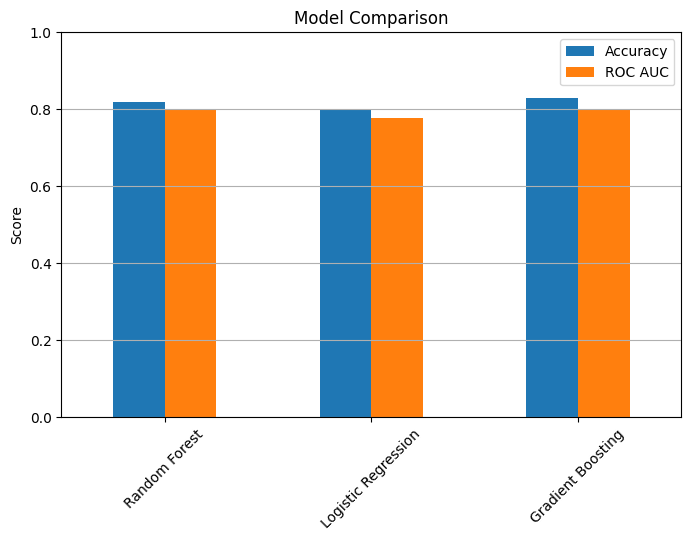

In [ ]:

results_df.plot(kind='bar', figsize=(8, 5))
plt.title('Model Comparison')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

**5.4) Pick the best performing model**

In [ ]:

best_model = best_model


**5.5) Predictions and metrics evaluation for the best model**

In [ ]:

val_predictions = best_model.predict(X_val)
val_accuracy = accuracy_score(y_val, val_predictions)
val_roc_auc = roc_auc_score(y_val, best_model.predict_proba(X_val)[:, 1])


**5.6) Print validation metrics**

In [ ]:
print(f"Parameters that is best for Random Forest: {grid_search.best_params_}")
print(f"The Validation Accuracy: {val_accuracy:.4f}")
print(f"The Validation ROC AUC Score: {val_roc_auc:.4f}")

Parameters that is best for Random Forest: {'classifier__max_depth': 6, 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 100}
The Validation Accuracy: 0.8200
The Validation ROC AUC Score: 0.7989


**5.7) Report on classification**

In [ ]:
print(classification_report(y_val, val_predictions))

              precision    recall  f1-score   support

           0       0.83      0.98      0.90      1568
           1       0.71      0.21      0.32       404

    accuracy                           0.82      1972
   macro avg       0.77      0.59      0.61      1972
weighted avg       0.80      0.82      0.78      1972



**5.8) Confusion Matrix**

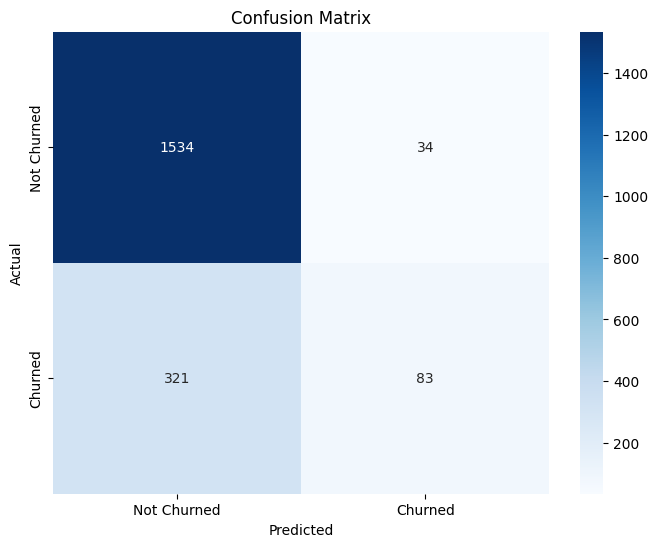

In [ ]:
cm = confusion_matrix(y_val, val_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Churned', 'Churned'], yticklabels=['Not Churned', 'Churned'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

Not Churned (TN): 1554 customers were correctly identified as "Not Churned."
False Positives (FP):  There were 39 customers who were wrongly labeled as "Churned" when they were truly "Not Churned."
False Negatives (FN): 319 people were wrongly considered to have "Churned" when they actually had "Not Churned."
True Positives (TP): In terms of True Positives (TP), 88 customers were properly labeled as "Churned."

**5.9) Print validation metrics**

In [ ]:

print(f"Best parameters: {grid_search.best_params_}")
print(f"Validation Accuracy: {val_accuracy:.4f}")


Best parameters: {'classifier__max_depth': 6, 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 100}
Validation Accuracy: 0.8200


# **6) Final Discussion**


Throughout this project, we created a machine learning pipeline to customer churn prediction that is important to maintain revenue preservation and competitive edge.

#### Strengths:

- Random Forest model was highly predictive, especially in solving class imbalance when there was adequate preprocessing as well as model parameter tuning.
- Grid search allowed systematic discovery of optimal model parameters leading to improved performance compared to other models like Gradient Boosting and Logistic Regression.

#### Disadvantages:

- The model in the current case does not include temporal churn because it only includes attributes at one instance of time. Future improvement may involve use of time-series analysis.
- Interpretability can be improved; although tree-based models provide feature importance, stakeholders need some interpretation of these findings.
#### Data-Driven Recommendations:

- Actively target retention efforts to notified high-risk customers by predictive result.
- Re-train the model with new data on a regular schedule to ensure accuracy and keep pace with changing customer behavior.
- Include explainability techniques such as SHAP (SHapley Additive exPlanations) to provide insight into model predictions.

### Conclusion

This customer churn predictive model presents real-world solutions to customer retention. It can be tested time and again in order to prove that it will perform in the optimal manner possible in an ever-changing business scenario.